In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv("Default_Fin.csv")

In [18]:
df.head(5)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [20]:
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [21]:
df=df.drop("Index",axis=1)

In [22]:
df.head(5)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


<Axes: xlabel='Employed', ylabel='count'>

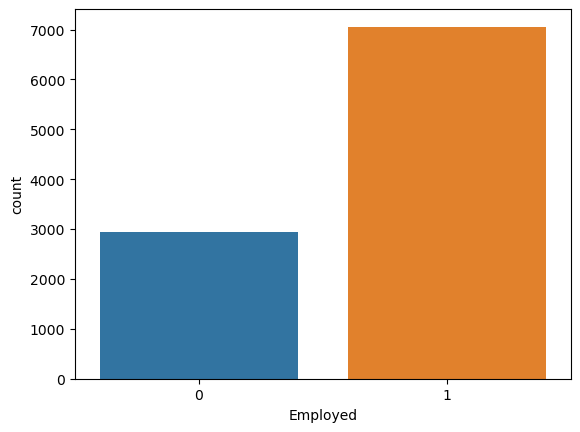

In [23]:
sns.countplot(data=df,x="Employed")

<Axes: xlabel='Defaulted?', ylabel='count'>

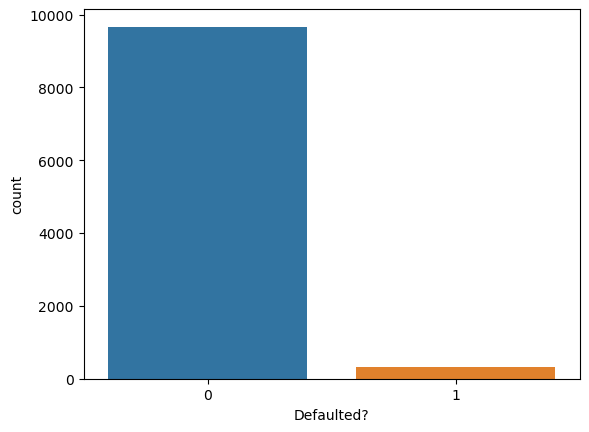

In [24]:
sns.countplot(data=df,x="Defaulted?")

In [25]:
data=df.copy()

In [26]:
df=df.drop("Defaulted?",axis=1)

In [27]:
df.head(5)

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00


<Axes: >

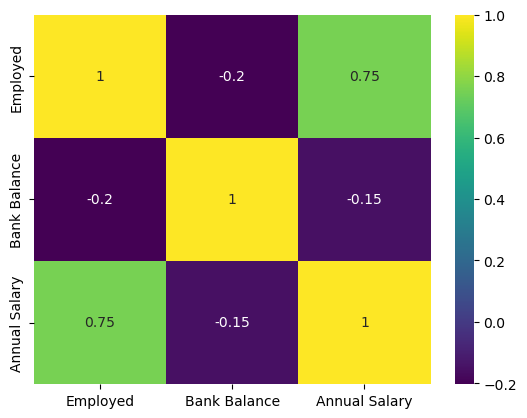

In [28]:
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
y=data["Defaulted?"]
x=data.drop("Defaulted?",axis=1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [32]:
x_train.shape

(8000, 3)

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [34]:
x_test = scaler.transform(x_test)

In [35]:
model=RandomForestClassifier()

In [36]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
results=model.predict(x_test)

In [38]:
accuracy_score(y_test,results)

0.9715

In [42]:
confusion_matrix(y_test,results)

array([[1923,   13],
       [  44,   20]], dtype=int64)